In [1]:
import fitting_tools as ft
import time
import numpy as np

import matplotlib.pylab as plt
%matplotlib notebook

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
nMC = 20000
ndata = 1200

data0 = np.random.random((2,ndata))
data1 = np.random.random((2,nMC))

<IPython.core.display.Javascript object>


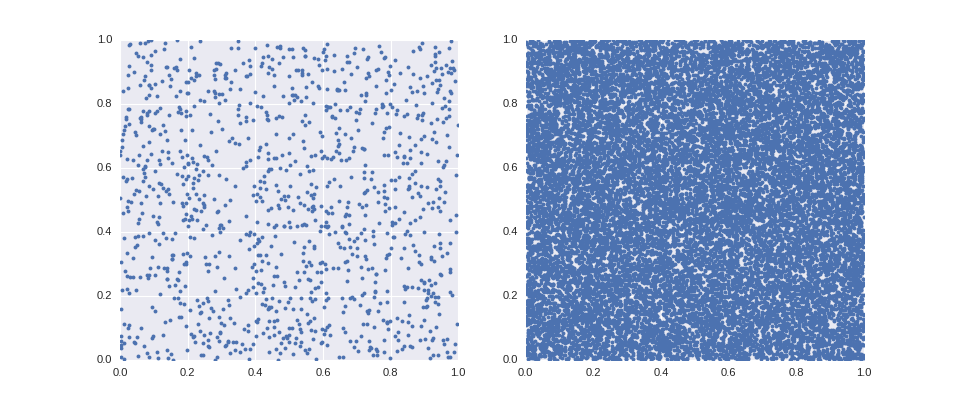

In [3]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(data0[0],data0[1],'.')
plt.subplot(1,2,2)
plt.plot(data1[0],data1[1],'.')

In [5]:
start = time.time()
nn_CPU = ft.nn(data0,data1,nneighbors=5)
print "This took %f seconds to run" % (time.time()-start)
len(nn_CPU)

[ 15309.54992098  17234.80154457  54281.864369   ...,  19050.97649881
  24208.33578857  16476.62886371]
This took 1.220300 seconds to run


1200

In [6]:
#start = time.time()
#nn_GPU = ft.nn(data0,data1,nneighbors=5)
#print "This took %f seconds to run" % (time.time()-start)
#print nn_GPU

In [7]:
#plt.figure(figsize=(12,5))
#plt.subplot(1,3,1)
#plt.hist(nn_CPU,label="CPU")
#plt.subplot(1,3,2)
#plt.hist(nn_GPU,label="GPU")
#plt.subplot(1,3,3)
#plt.hist(nn_GPU-nn_CPU,label="diff")

In [8]:
# Get the GPU info
import numba
import math
#npts = 100
my_gpu = numba.cuda.get_current_device()
thread_ct = my_gpu.WARP_SIZE
block_ct = int(math.ceil(float(nMC*ndata) / thread_ct))

print "# of blocks  ",block_ct
print "# of threads ",thread_ct

frac_nn_GPU = np.zeros(ndata*nMC, dtype = np.float32)
nneigh=5


start = time.time()

ft.number_of_nearest_neighbors_GPU[block_ct, thread_ct](np.float32(data0[0]), np.float32(data0[1]), len(data0[1]), np.float32(data1[0]), np.float32(data1[1]),len(data1[1]), frac_nn_GPU) #, 0.1)
print "Time for GPU implementation:  %f" % (time.time()-start)


print frac_nn_GPU
print len(frac_nn_GPU)






# of blocks   750000
# of threads  32
Time for GPU implementation:  0.068363
[ 0.04588184  0.19672649  0.46120825 ...,  1.27574301  0.73615849
  0.50889164]
24000000


In [9]:
len(frac_nn_GPU[frac_nn_GPU==0])

0

In [10]:
start=time.time()
sorted_array=ft.sort_GPU(ndata,nMC,frac_nn_GPU,5)
nn_GPU,a,x=sorted_array
print "Time for GPU to sort:  %f" % (time.time()-start)

Time for GPU to sort:  0.184773


In [11]:
out = frac_nn_GPU[100*nMC:101*nMC]
sout = a[100*nMC:101*nMC]

print max(out),sout[-1]

1.22657 1.22657


In [12]:
min(nn_GPU)

7062.1396

<IPython.core.display.Javascript object>


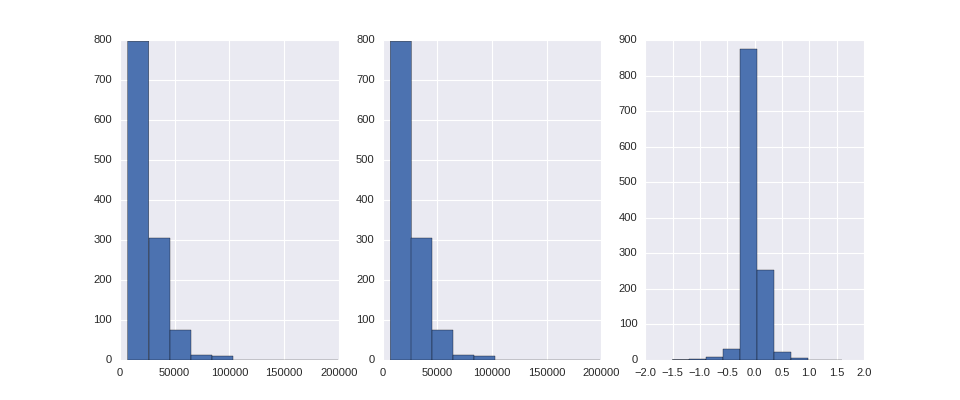

(array([   1.,    2.,    9.,   32.,  874.,  253.,   23.,    5.,    0.,    1.]),
 array([-1.50330315, -1.19278906, -0.88227497, -0.57176088, -0.26124678,
         0.04926731,  0.3597814 ,  0.67029549,  0.98080959,  1.29132368,
         1.60183777]),
 <a list of 10 Patch objects>)

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.hist(nn_CPU,label="CPU")
plt.subplot(1,3,2)
plt.hist(nn_GPU,label="GPU")
plt.subplot(1,3,3)
plt.hist(nn_GPU-nn_CPU,label="diff")


In [ ]:
print sum(nn_GPU-nn_CPU)

In [ ]:
import numba
import math
#npts = 100
my_gpu = numba.cuda.get_current_device()
thread_ct = my_gpu.WARP_SIZE
#block_ct = int(math.ceil(float(ndata) / thread_ct))
block_ct= int(math.ceil(float(ndata*nMC)/thread_ct))
print thread_ct
print block_ct

frac_distances_GPU = np.zeros(ndata*nMC, dtype = np.float32)
nneigh=5


start = time.time()

ft.distances_GPU[block_ct, thread_ct](np.float32(data0[0]), np.float32(data0[1]), len(data0[1]), np.float32(data1[0]), np.float32(data1[1]),len(data1[1]), frac_distances_GPU) #, 0.1)
print "Time for GPU implementation:  %f" % (time.time()-start)

print frac_distances_GPU
print len(frac_distances_GPU)


In [ ]:
len(frac_distances_GPU[frac_distances_GPU==0])

for x in frac_distances_GPU:
    if ()

In [ ]:
print 313*32

print 100*100


In [ ]:
def bubblesort(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

In [ ]:
#array=np.array([4,5,11,3,1,9,0,8,30])
#array = np.random.random(10000)
#bubblesort(array)
#print array

In [ ]:
#array=np.array([4,5,11,3,1,9,0,8,30])
array = np.random.random(1024)
ft.bubblesort_jit[32,32](array)
print array

In [ ]:
import accelerate.cuda.sorting as csort

In [ ]:
#npts = 16777216
npts = 16384
array = np.random.random(npts)

print array
start = time.time()
array.sort()
print "This sort took %f seconds" % (time.time()-start)
print array


In [ ]:
mysort = csort.RadixSort(npts,float)

array = np.random.random(npts)
print array
start = time.time()
mysort.sort(array)
print "This sort took %f seconds" % (time.time()-start)
print array


In [ ]:
array = np.random.random(1024)
print array
mysort.sort(array)
print array

In [ ]:
npts = 10000

ndata = 1000
nMC = 10000

array = np.random.random((ndata,nMC))

start = time.time()
array = array.flatten()
index = np.arange(0,ndata*nMC).astype(np.uint32)
x = np.arange(nMC,ndata*nMC,nMC).astype(np.uint32)

segsort = csort.segmented_sort(array,index,x)
print "This sort took %f seconds" % (time.time()-start)

print array[nMC-10:nMC]
print array[nMC:nMC+10]


In [ ]:
array = np.random.random((ndata,nMC))

start = time.time()
for a in array:
    a.sort()
print "This sort took %f seconds" % (time.time()-start)


In [ ]:
array[1]

In [ ]:
print data0[0]

In [ ]:
arr_ax=data0[0]
arr_ay=data0[1]
arr_bx=data1[0]
arr_by=data1[1]
i=0

a0x = arr_ax[i] #The x value for each thread and data set 1
a0y = arr_ay[i] #The y value for each thread and data set 1
arr_out=frac_nn_GPU

narr_b = len(arr_bx)
diff=np.zeros(npts)

for d in xrange(narr_b): #looping through the second data set
        diffx=a0x-arr_bx[d] #finding the difference of the x value in data set 1 and the whole data set 2
        diffy=a0y-arr_by[d]
        diff[d]=diffx*diffx + diffy*diffy
        #diff=np.array(diff)
        #print diff
        #diff=np.array(diff)
        #diff.sort()
        #radius2 = diff[nneigh-1]
        #arr_out[i]=radius2
        #arr_out[i]=(float(nneigh)/(np.pi*radius2))
        #arr_out[i]=diff
        #print diff
print diff
diff.sort()
print diff
#print len(arr_out)